In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from hinge_feature_extraction import * 
from cold_feature_extraction  import * 
from PIL import Image, ImageEnhance
from tqdm import tqdm



### Reading handwritten images from file and store it with it's lable 
for male y =0 and for female y =1

In [5]:
hinge_feature_vector = []
cold_feature_vector =[]
feature_vector =[]
y_data =[]
cold = Cold()
hinge = Hinge()


In [6]:
lables = ["Males" , "Females"]

def feature_extraction(filename):
    data = []
    currentDirectory = os.getcwd()
    # for each class we read it's data 
    for lable in lables:
         directory = filename+"\\"+ lable+"\\"+lable+"\\"
         path =os.path.join(currentDirectory, directory)
         class_lable = lables.index(lable)
         print(str(class_lable) + "start ..")
         for imagename in tqdm(os.listdir(path)):
            try:
                img_path = os.path.join(path, imagename)
                hinge_f = hinge.get_hinge_features(img_path)
                cold_f = cold.get_cold_features(img_path)
                hinge_feature_vector.append(hinge_f)
                cold_feature_vector.append(cold_f)
                feature_vector.append([hinge_f , cold_f])
                y_data.append(class_lable)
            except Exception as e :
                print (e)

    return np.array(data)


In [ ]:
data = feature_extraction("data_set") 


0start ..


 94%|███████████████████████████████████████████████████████████████████████████▌    | 219/232 [16:42<01:32,  7.15s/it]

### spliting the data with randomness and visualizing the data 

[[[array([3.37288203e-04, 1.74596246e-03, 1.19042895e-03, 7.93619301e-04,
          7.53938336e-04, 7.73778818e-04, 4.36490615e-04, 8.72981231e-04,
          6.54735923e-04, 1.13090750e-03, 1.01186461e-03, 1.05154557e-03,
          7.93619301e-04, 9.72183644e-04, 2.06341018e-03, 1.94436729e-03,
          2.48006032e-03, 2.89671045e-03, 2.12293163e-03, 1.92452680e-03,
          1.05154557e-03, 4.16650133e-04, 7.14257371e-04, 4.36490615e-04,
          4.36490615e-04, 5.55533511e-04, 1.07138606e-03, 1.62691957e-03,
          6.74576406e-04, 3.76969168e-04, 1.58723860e-04, 3.76969168e-04,
          2.77766755e-04, 2.38085790e-04, 2.97607238e-04, 2.97607238e-04,
          7.93619301e-05, 5.95214476e-05, 0.00000000e+00, 5.15852546e-04,
          1.92452680e-03, 1.32931233e-03, 1.11106702e-03, 7.73778818e-04,
          8.33300266e-04, 1.11106702e-03, 1.03170509e-03, 1.23010992e-03,
          5.95214476e-04, 1.05154557e-03, 9.92024126e-04, 1.03170509e-03,
          1.64676005e-03, 1.82532439e-

In [4]:
data_train , data_test , y_train , y_test = train_test_split(feature_vector , data[:,1]  , test_size =0.20 , random_state =42)

C:\Users\Yousif-Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

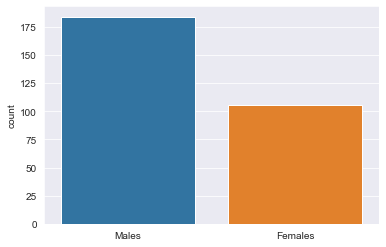

In [5]:
lables = []
for i in y_train:
    if(i == 0):
        lables.append("Males")
    else:
        lables.append("Females")
sns.set_style('darkgrid')
sns.countplot(lables)

In [159]:
image_gray = cv2.cvtColor(data_train[2], cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY_INV,11,2)
